In [18]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("adult_census_data.csv")
print(df.head())
print(df.columns)

   39          State-gov   77516   Bachelors   13        Never-married   
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse  \
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40   
0     Exec-managerial         Husband   White     Male      0   0   13  \
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [19]:
# Filter out other columns
criteria = [' State-gov', ' Bachelors', ' Never-married', \
            ' Adm-clerical',' Not-in-family',' White',' Male',' United-States',' <=50K']
df = df[criteria]
print(df.head())

           State-gov   Bachelors        Never-married        Adm-clerical   
0   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial  \
1            Private     HS-grad             Divorced   Handlers-cleaners   
2            Private        11th   Married-civ-spouse   Handlers-cleaners   
3            Private   Bachelors   Married-civ-spouse      Prof-specialty   
4            Private     Masters   Married-civ-spouse     Exec-managerial   

    Not-in-family   White     Male   United-States   <=50K  
0         Husband   White     Male   United-States   <=50K  
1   Not-in-family   White     Male   United-States   <=50K  
2         Husband   Black     Male   United-States   <=50K  
3            Wife   Black   Female            Cuba   <=50K  
4            Wife   White   Female   United-States   <=50K  


In [20]:
# Rename columns for convenience
names = ['Employment Type', 'Degree Status', 'Marriage-Status', \
         'Job-Role', 'Family-Role', 'Ethnicity', 'Gender', 'Country', 'Earnings']
new = dict(zip(criteria,names))
df.rename(columns=new,inplace=True)
print(df.columns)

Index(['Employment Type', 'Degree Status', 'Marriage-Status', 'Job-Role',
       'Family-Role', 'Ethnicity', 'Gender', 'Country', 'Earnings'],
      dtype='object')


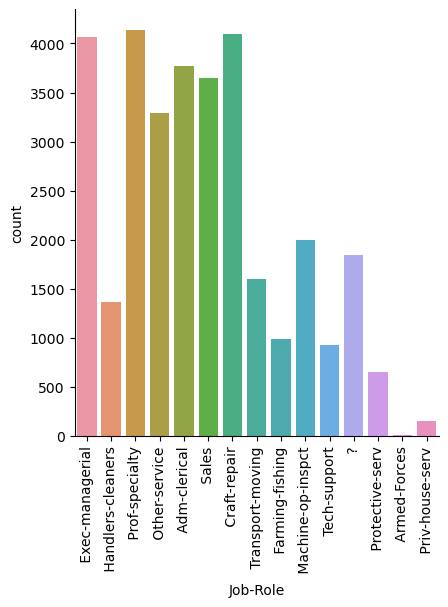

In [21]:
# Explore frequency of jobs
sns.catplot(data=df,kind='count',x='Job-Role')
plt.xticks(rotation=90)
plt.show()

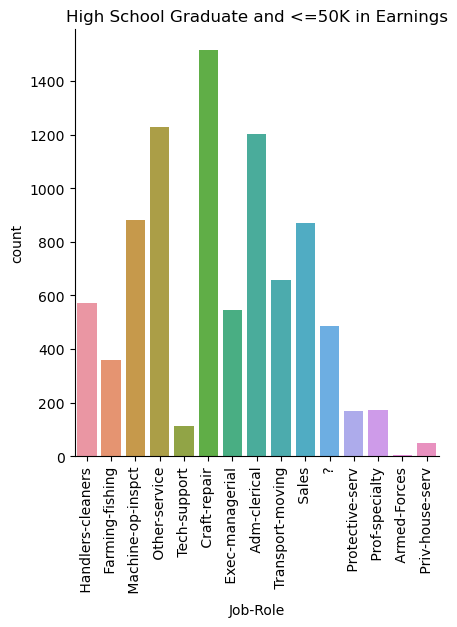

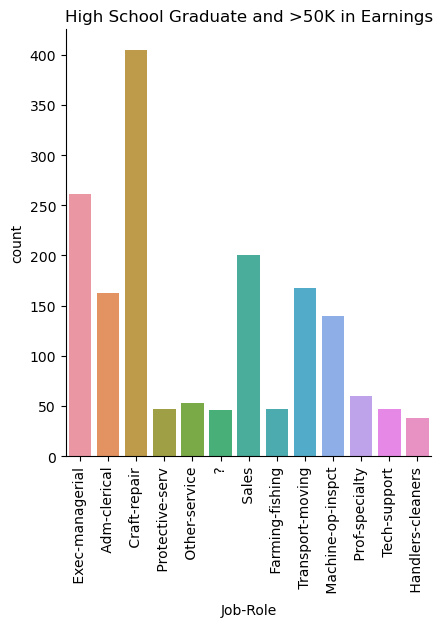

In [22]:
# Filter by Degree Status and Earnings
low_money = df['Earnings'] == ' <=50K'
high_money = df['Earnings'] == ' >50K'
diploma = df['Degree Status'] == ' HS-grad'
filtered = df[low_money & diploma]
sns.catplot(data=filtered,kind='count',x='Job-Role')
plt.xticks(rotation=90)
plt.title('High School Graduate and <=50K in Earnings')
plt.show()

filtered2 = df[high_money & diploma]
sns.catplot(data=filtered2,kind='count',x='Job-Role')
plt.xticks(rotation=90)
plt.title('High School Graduate and >50K in Earnings')
plt.show()

In [36]:
# Find the highest proportion of individuals who earn >50K by Job,
# First, reassign the 'filtered' variable to only look at Earnings
filtered = df[high_money]

# Then, count the number of people in each job AND the number of people in each job who make more than 50K
job_counts = dict(df['Job-Role'].value_counts())
high_job_counts = dict(filtered['Job-Role'].value_counts())

# Reassign the keys to a list, and sort it.
job_counts_keys = list(job_counts.keys())
job_counts_keys.sort()
high_job_counts_keys = list(high_job_counts.keys())
high_job_counts_keys.sort()

# Once lists are sorted, create a new dictionary with the sorted keys
job_counts_sorted = {i: job_counts[i] for i in job_counts_keys}
high_job_counts_sorted = {i: high_job_counts[i] for i in high_job_counts_keys}

# Zip the keys and values together to be divided later
keys_zipped = dict(zip(job_counts_sorted, high_job_counts_sorted))
values_zipped = dict(zip(high_job_counts_sorted.values(),job_counts_sorted.values()))


# Prepared keys and blank list to be zipped
sorted_keys = job_counts_sorted.keys()
percentages = []

# Divide to find the percentage of high income earners per job
for x,y in values_zipped.items():
    result = x / y
    percentages.append(result)
final = dict(zip(sorted_keys,percentages))

# Iterate through the dictionary to find the highest percentage per job
highest_percentage = 0
for x, y in final.items():
    if y > highest_percentage:
        highest_percentage = y
target = list(final.keys())[list(final.values()).index(highest_percentage)]
print(target)

 Exec-managerial
